<a href="https://colab.research.google.com/github/jccrews256/ST-554-Repo/blob/main/Homework%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
*By: Cass Crews*

## Part 1: Summarizing Student Data Graphically

For the first part of homework 4, we will continue our exploratory data analysis of student math scores from two Portuguese schools. Thus, the numerical summaries generated for homework 3 are included below for reference.

Before we begin, we need to read in the required modules.

In [1]:
# Reading in required modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Summarizing Data Numerically (From Homework 3)

For the second part of this homework, we will explore student math performance across two different Portuguese schools.

#### Reading in the Data

Our first step is to read in the data directly from the URL. We'll need to account for the fact that these data are semicolon-delimited using the `sep` argument of `pd.read_csv()`. After reading in the data, we will print the first five rows to ensure things were read in correctly.

In [2]:
# Reading in the data
student_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/StudentData.txt", sep = ";")

# Printing the first few rows
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In looking at the first few rows, as well as the first and final 10 columns, it seems the data read in cleanly.

#### Summarizing the Data

Now that we have read the data in, we will generate a few numeric summaries. The first set of summaries will focus on the categorical variables, before we transition to the numeric variables.

##### Categorical Variables

We will use contingency tables to explore the categorical variables.

Let's start with a one-way table displaying the number of students from each school. While I don't know much about Portuguese schools, we can still swap to school labels that provide the full school names for people who are knowledgeable. To make this update, we will need to convert `school` to a category type and identify its initial categories.

In [3]:
# Converting school to category type
student_data.school = student_data.school.astype("category")

# Identifying categories for school
student_data.school.cat.categories

Index(['GP', 'MS'], dtype='object')

Now that we know the categories and their order, we can swap in the full school names and generate the contingency table.

In [4]:
# Creating a categorical version of school
student_data.school = student_data.school.cat.rename_categories(["Gabriel Pereira", "Mousinho da Silveira"])

# one-way contingency table for school
student_data.school.value_counts()

,count
school,
Gabriel Pereira,349
Mousinho da Silveira,46


It is notable that 349 out of the 395 students are from one school -- Gabriel Pereira. We need to be cognizant of the fact that student performance at this school will dominate many of the summary statistics we explore.

As one way of exploring how these schools may be different, let's explore the rates at which each offers extra educational support to the students via a two-way contingency tabl. As it's good practice, we will also convert `schoolsup` to category type.

In [5]:
# Converting schoolsup to category type
student_data.schoolsup = student_data.schoolsup.astype("category")

In [6]:
# two way contingency table for school and schoolsup
pd.crosstab(student_data.school,
            student_data.schoolsup,
            margins = True,
            rownames = ["School"],
            colnames = ["Extra Edu Support?"])

Extra Edu Support?,no,yes,All
School,,,
Gabriel Pereira,298,51,349
Mousinho da Silveira,46,0,46
All,344,51,395


This is a stark contrast! While 51 of the 349 students from Gabriel Pereira receive extra educational support, none of the students from Mousinho da Silveira receive extra support.

Now let's explore, by school, the relationship between participation in extra-curricular activities and the number of past class failures. Again, to align with best practices, we will convert `activities` and `failures` to category types. Because a value of 4 for `failures` actually means 4+ failures, we may need to tweak the labels accordingly.

In [7]:
# Converting activities to category type
student_data.activities = student_data.activities.astype("category")

# Converting failures to category type
student_data.failures = student_data.failures.astype("category")

# Printing categories for failures
student_data.failures.cat.categories

Index([0, 1, 2, 3], dtype='int64')

It turns out no student failed more than three classes, so no tweaks are needed. We are now ready to create the three-way contingency table.

In [8]:
# Three way contingency table for school, activities, and failures
pd.crosstab([student_data.school, student_data.activities],
            student_data.failures,
            margins = True,
            rownames = ["School", "Extracurric Activities?"],
            colnames = ["Past Failures"])

Past Failures                                   0   1   2   3  All
School               Extracurric Activities?                      
Gabriel Pereira      no                       130  18   7   9  164
                     yes                      150  23   7   5  185
Mousinho da Silveira no                        20   6   2   2   30
                     yes                       12   3   1   0   16
All                                           312  50  17  16  395

Given the differing school sizes, it's not particularly easy to make comparisons. However, by simply comparing no-failure rates between Gabriel Pereira students who do and do not participate in extra-curricular activities, we see a failure rate of 100\*(130/164)=79% for those who don't participate vs. 100\*(150/185)=81% for those who do. Thus, it doesn't seem extra-curricular participation is a great indicator of past school performance.

Another question we can explore is whether living in a rural or urban setting is related to whether or not a student's family provides educational support, and whether this relationship differs by the sex of the student. To start this exploration, let's create a two-way contingency table for rural/urban and family support specifically for females by using `.loc[]` to create a female-only subset. Before doing so, we should convert `sex` to a category-type variable and give more informative labels; we will use this variable a lot. As a first step, we will make the conversion and see how the categories are currently saved.

In [9]:
# Converting sex to category
student_data.sex = student_data.sex.astype("category")

# Printing categories
student_data.sex.cat.categories

Index(['F', 'M'], dtype='object')

Now we can update the category labels, create the female-only subset, and produce the contingency table.

In [10]:
# Giving sex more informative labels
student_data.sex = student_data.sex.cat.rename_categories(["Female", "Male"])

# Converting address and famsup to categories
student_data.address = student_data.address.astype("category")
student_data.famsup = student_data.famsup.astype("category")

# Subsetting to female students
student_data_female = student_data.loc[student_data.sex == "Female"]

# Two-way contingency table for address (type) and famsup, for females only
pd.crosstab(student_data_female.address,
            student_data_female.famsup,
            margins = True,
            rownames = ["Rural/Urban"],
            colnames = ["Family Edu Support?"])

Family Edu Support?,no,yes,All
Rural/Urban,,,
R,15,29,44
U,51,113,164
All,66,142,208


There are no major difference in the rates of family support between rural- and urban-based females, as 100\*(29/44)=66% of rural-based female students compared to 100\*(113/164)=69% for urban-based females.

How about for male students? To create this conditional table, let's create a three-way contingency table for sex, family support, and rural/urban status and then subset the table.

In [11]:
# Creating three-way table for sex, famsup, and address (type)
table_3 = pd.crosstab([student_data.address, student_data.sex],
                      student_data.famsup,
                      margins = True,
                      rownames = ["Rural/Urban", "Sex"],
                      colnames = ["Family Edu Support?"]
                        )
# Printing table subset to only male students
table_3.loc[(("R","U"), "Male"), : ]

,Family Edu Support?,no,yes,All
Rural/Urban,Sex,,,
R,Male,21,23,44
U,Male,66,77,143


Similar to females, there are effectively no differences in family support between rural and urban males; just over half of rural male students receive family support (100\*(23/44)=52%), compared to 100\*(77/143)=54% of urban males.

It seems the major differences in family support are between male and female students, regardless of their rural/urban status.

##### Numerical Variables

In this subsection, we will calculate measures of center and spread for a few numeric variables in the dataset, repeat the calculations conditional on categorical variables, and analyze pairwise correlations.

To start, let's calculate the mean, median, and standard deviation of `age`, `absences`, and `G3` (final grade).

Means:

In [12]:
# Means of age, absences, and G3
student_data[["age", "absences", "G3"]].mean()

,0
age,16.696203
absences,5.708861
G3,10.415190


Medians:

In [13]:
# Medians of age, absences, and G3
student_data[["age", "absences", "G3"]].median()

,0
age,17.0
absences,4.0
G3,11.0


Standard deviations:

In [14]:
# Standard deviations of age, absences, and G3
student_data[["age", "absences", "G3"]].std()

,0
age,1.276043
absences,8.003096
G3,4.581443


Looking at these statistics, the most notable finding may be the fact that the standard deviation for the number of absences is well above the mean number and twice the median.

How many days are some students missing? Let's extract the maximum number to quell our (my) curiosity.

In [15]:
# Max number of absences
student_data.absences.max()

75

75 days?! Yikes!

Let's again subset the dat to only female and see how the statistics change.

Means:

In [16]:
# Means of age, absences, and G3 for females only
student_data.loc[student_data.sex == "Female"][["age", "absences", "G3"]].mean()

,0
age,16.730769
absences,6.216346
G3,9.966346


Medians:

In [17]:
# Medians of age, absences, and G3 for females only
student_data.loc[student_data.sex == "Female"][["age", "absences", "G3"]].median()

,0
age,17.0
absences,4.0
G3,10.0


Standard deviations:

In [18]:
# Standard deviations of age, absences, and G3 for females only
student_data.loc[student_data.sex == "Female"][["age", "absences", "G3"]].std()

,0
age,1.201696
absences,9.445819
G3,4.622338


While the female-only age statistics are comparable to those overall, the mean number of absences is higher for the female-only subgroup and both measures of center (mean and median) for final math grade are lower for the subgroup.

How do the overall statistic values compare across the two schools? Let's find out starting with `age`.

In [19]:
# Generating summary stats for age by school
pd.pivot_table(student_data, values = "age", index = "school",
               aggfunc = ["mean", "median", "std"], observed = False)

,mean,median,std
,age,age,age
school,,,
Gabriel Pereira,16.521490,16.0,1.216610
Mousinho da Silveira,18.021739,18.0,0.881643


Interestingly, students and Mousinho da Silveira are much older. I wonder why. This is the same school with a much smaller roster....

Let's look at absences!

In [20]:
# Generating summary stats for absences by school
pd.pivot_table(student_data, values = "absences", index = "school",
               aggfunc = ["mean", "median", "std"], observed = False)

,mean,median,std
,absences,absences,absences
school,,,
Gabriel Pereira,5.965616,4.0,8.341764
Mousinho da Silveira,3.760870,3.0,4.274913


Meanwhile, students of the larger Gabriel Pereira tend to have more absences, and the higher standard deviation indicates the school likely has more of the very-high-absence students.

Last, let's look at final math grades.

In [21]:
# Generating summary stats for G3 by school
pd.pivot_table(student_data, values = "G3", index = "school",
               aggfunc = ["mean", "median", "std"], observed = False)

,mean,median,std
,G3,G3,G3
school,,,
Gabriel Pereira,10.489971,11.0,4.625397
Mousinho da Silveira,9.847826,10.0,4.237229


While students at Gabriel Pereira tend to have more absences, they also perform better, on average, in math class.

Let's find out how family educational support (`famsup`) relates to these numeric variables at each school. Again, we will start with `age`.

In [22]:
# Generating summary stats for age by school and famsup
pd.pivot_table(student_data, values = "age", index = ["school", "famsup"],
               aggfunc = ["mean", "median", "std"], observed = False)

mean median       std
                                   age    age       age
school               famsup                            
Gabriel Pereira      no      16.664000   17.0  1.282286
                     yes     16.441964   16.0  1.173790
Mousinho da Silveira no      18.071429   18.0  0.857584
                     yes     17.944444   18.0  0.937595

Not too surprisingly, the age statistics vary little across family support. It is somewhat intriguing that, at both schools, the mean is slightly smaller for those with family support. One or two child prodigies with good family support? Ah, probably not!

Onto `absences`!

In [23]:
# Generating summary stats for absences by school and famsup
pd.pivot_table(student_data, values = "absences", index = ["school", "famsup"],
               aggfunc = ["mean", "median", "std"], observed = False)

mean   median       std
                             absences absences  absences
school               famsup                             
Gabriel Pereira      no      5.944000      4.0  9.048529
                     yes     5.977679      4.0  7.941176
Mousinho da Silveira no      3.321429      2.0  3.906818
                     yes     4.444444      4.0  4.829106

This is a bit more intriguing. At Gabriel Pereira, the mean and median number of absences are fairly similar across those with and without family support; the standard deviation is roughly one absence higher for those with family support. Meanwhile, at Mousinho da Silveira, the mean and median absences for those with family support are both well above those without family support. I can't say I saw that coming!

And now, final grades!

In [24]:
# Generating summary stats for absences by school and famsup
pd.pivot_table(student_data, values = "G3", index = ["school", "famsup"],
               aggfunc = ["mean", "median", "std"], observed = False)

mean median       std
                                    G3     G3        G3
school               famsup                            
Gabriel Pereira      no      10.864000   11.0  4.611249
                     yes     10.281250   11.0  4.630413
Mousinho da Silveira no       9.642857   10.0  4.699994
                     yes     10.166667   10.0  3.502100

This is truly interesting. At Gabriel Pereira, the average final grade for those with family educational support is more than half a unit below those without. At Mousinho da Silveira, the opposite is true. It should be noted that at both schools, the medians are identical for those with and without family support. Thus, there could be a few outliers influencing these per-school differences in means.

We've explored how a few of the numeric variables relate to categorical variables, but how are they related to each other? Let's find out by generating a table of pairwise correlations.

In [25]:
# Generating pairwise correlation table
student_data[["age", "absences", "G1", "G2", "G3"]].corr()

,age,absences,G1,G2,G3
age,1.000000,0.175230,-0.064081,-0.143474,-0.161579
absences,0.175230,1.000000,-0.031003,-0.031777,0.034247
G1,-0.064081,-0.031003,1.000000,0.852118,0.801468
G2,-0.143474,-0.031777,0.852118,1.000000,0.904868
G3,-0.161579,0.034247,0.801468,0.904868,1.000000


I am surprised to see effectively no correlation between the number of absences and the final math grade. Of course, we'll want to plot some of these relationships to ensure we are not trying to measure linear relationships when the relationships are actually non-linear.

### Task 1: Graphical Summaries

We will now summarize the data graphically to gain further understanding of the variables' distributions.

#### Categorical Variables

Let's begin with the categorical variables. We previously explored the patterns of family education support by rural/urban status for each of female and male students. Let's create some comparative bar plot equivalents of those contingency tables.

For the female-only bar plot, let's use a stacked bar plot.

Text(0.5, 1.0, 'Female Student Breakdown by Family Support and Rural/Urban Status')

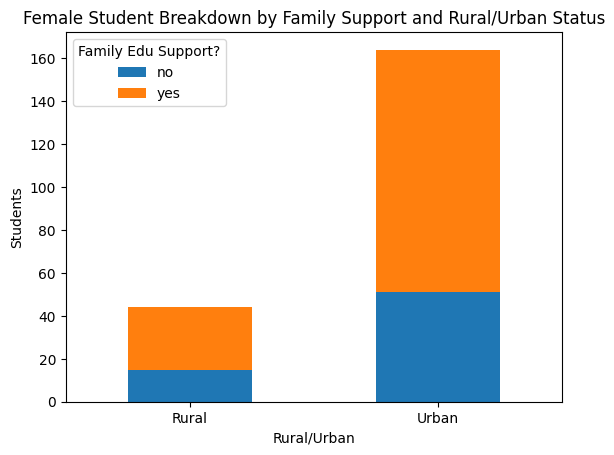

In [26]:
# Two-way contingency table for address (type) and famsup, for females only
female_table = pd.crosstab(student_data_female.address,
            student_data_female.famsup,
            rownames = ["Rural/Urban"],
            colnames = ["Family Edu Support?"])

# Generating stacked bar plot
female_table.plot.bar(stacked = True, rot = 0)
plt.xticks([0, 1], ["Rural", "Urban"]) # Adding clean labels
plt.ylabel("Students") # Adding y axis label
# Adding title
plt.title("Female Student Breakdown by Family Support and Rural/Urban Status")

We can now easily see that while there are many more female students living in urban areas than rural areas, family support rates are roughly the same.

Let's look at the same breakdown for male students, but let's use a side-by-side bar plot this time.

Text(0.5, 1.0, 'Male Student Breakdown by Family Support and Rural/Urban Status')

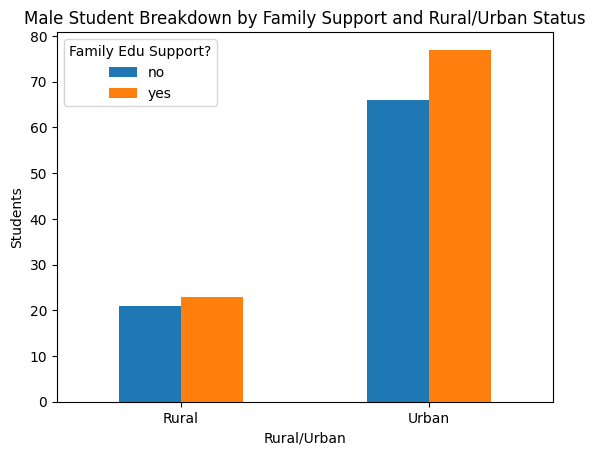

In [27]:
# Subsetting to male students
student_data_male = student_data.loc[student_data.sex == "Male"]

# Two-way contingency table for address (type) and famsup, for males only
male_table = pd.crosstab(student_data_male.address,
            student_data_male.famsup,
            rownames = ["Rural/Urban"],
            colnames = ["Family Edu Support?"])

# Generating stacked bar plot
male_table.plot.bar(rot = 0)
plt.xticks([0, 1], ["Rural", "Urban"]) # Adding clean labels
plt.ylabel("Students") # Adding y axis label
# Adding title
plt.title("Male Student Breakdown by Family Support and Rural/Urban Status")

I find side-by-side bar plots easier to read, as in group comparisons (e.g., rural only) are easier.

We clearly see what we concluded when studying the contingency tables: Rural/urban status also does not seem to impact family support rates for male students, but male students are less likely to receive family education support than their female counterparts.

#### Numeric Variables

Let's visually explore some of the numeric variables. To start, let's generate comparative histograms, kernel density plots, and boxplots exploring the distributions of final grades, or `G3`, for each school. We'll start with the histograms.

[Text(0.5, 0, 'Final Grade')]

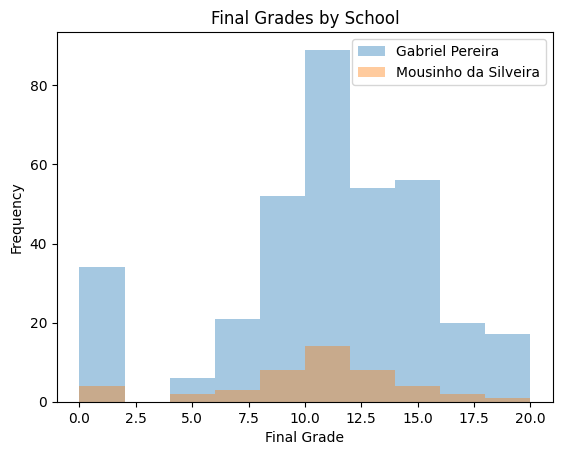

In [28]:
# Extracting the G3 series for each school
g3_gp = student_data.loc[student_data.school == "Gabriel Pereira", "G3"]
g3_ms = student_data.loc[student_data.school == "Mousinho da Silveira", "G3"]

# Making the two series the same length before zipping
g3_ms = pd.concat([g3_ms, pd.Series([np.nan for _ in range(len(g3_gp) - len(g3_ms))])])

# Creating the dataframe for plotting
plotting_df = pd.DataFrame(zip(g3_gp, g3_ms),
                           columns = ["Gabriel Pereira", "Mousinho da Silveira"])

# Generating the plot
plotting_df.plot.hist(alpha = 0.4, title = "Final Grades by School") \
    .set(xlabel = "Final Grade")


The shapes of these distributions are relatively similar, with a generally bell-shaped curve when we ignore the clusters of very low scores.

However, the differences in sample size do make it difficult to effectively compare the distributions. The overlayed density plots will make this either by rescaling to account for the differing samples sizes.

[Text(0.5, 0, 'Final Grade')]

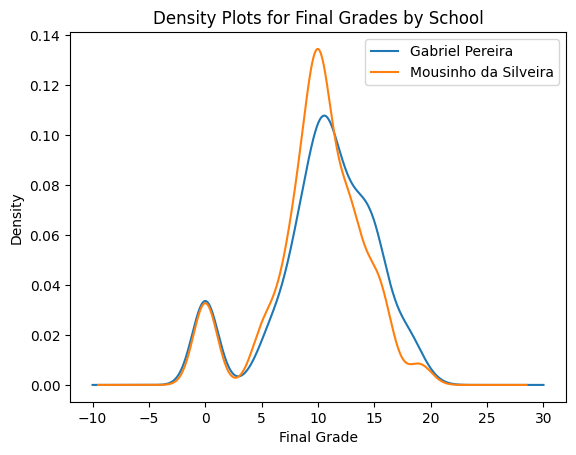

In [29]:
plotting_df.plot.density(bw_method = 0.25,
                         title = "Density Plots for Final Grades by School") \
                         .set(xlabel = "Final Grade")

These empirical distributions truly are very similar. We can see that students from Gabriel Pereira are more likely to receive some of the highest scores, which explains why the mean score is higher for that school.

Note that in trying to smooth out this effectively generalized histogram, we do get some undesirable results. In particular, note that while it is not possible to score below a 0, the smoothing results in non-zero density for negative scores.

Let's generate some side-by-side box plots, as these also allow for effective comparison of empirical distributions with different sample sizes.

Text(0.5, 1.0, '')

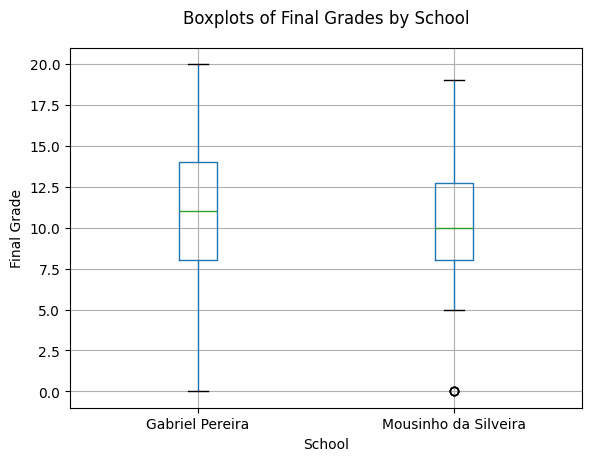

In [30]:
# Generating comparative box plots
student_data.boxplot(column = ["G3"], by = "school") \
                     .set(xlabel = "School", ylabel = "Final Grade")
plt.suptitle("Boxplots of Final Grades by School") # Adding overall title
plt.title("") # Removing subtitle with column name

This provides a very effective comparison, as we can clearly see that more of the Gabriel Pereira students received scores above 10, given that the 75th percentile is roughly a full point higher.

One thing to note: the overall greater variability of scores for Gabriel Pereira results in its scores of 0 not being considered outliers.

Arguably the most surprising finding from the numeric summaries above was the major difference in mean age across the two schools; I still wonder whether we are actually comparing the same classes or actually comparing "apples and oranges." Let's visually explore the age distributions for each school.

[Text(0.5, 0, 'Age')]

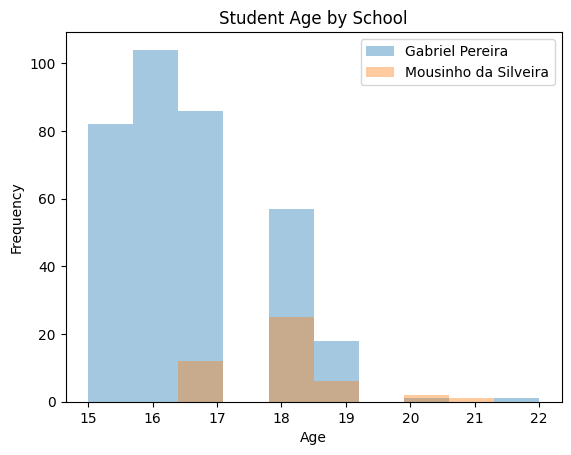

In [31]:
# Extracting the age series for each school
age_gp = student_data.loc[student_data.school == "Gabriel Pereira", "age"]
age_ms = student_data.loc[student_data.school == "Mousinho da Silveira", "age"]

# Making the two series the same length before zipping
age_ms = pd.concat([age_ms, pd.Series([np.nan for _ in range(len(age_gp) - len(age_ms))])])

# Creating the dataframe for plotting
plotting_df_age = pd.DataFrame(zip(age_gp, age_ms),
                           columns = ["Gabriel Pereira", "Mousinho da Silveira"])

# Generating the plot
plotting_df_age.plot.hist(alpha = 0.4, title = "Student Age by School") \
    .set(xlabel = "Age")

Fascinating! While most students at Gabriel Pereira are between 15 and 17, a much smaller share at Mousinho da Silveira fall into that age group.

Also note that a few students at both schools who are between 20 and 22. The last thing to note is a complexity of histograms: The visualization implies that there are clusters of student ages with breaks between. That is not actually the case. What is actually happening is that age is an integer and not all bins actually contain an integer. Let's recreate the plot with manually set bins to overcome this issue.

[Text(0.5, 0, 'Age')]

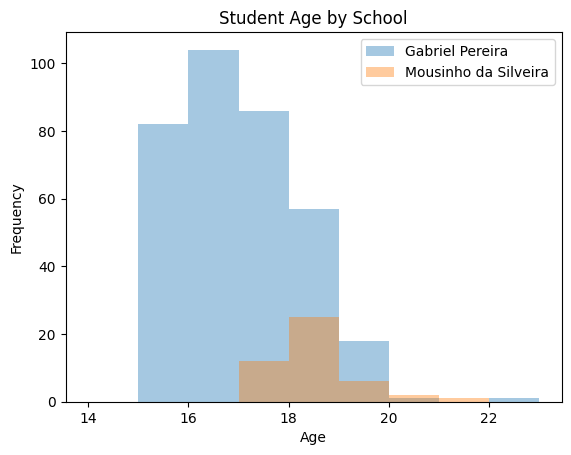

In [32]:
# Generating the plot
plotting_df_age.plot.hist(bins = range(14,24), alpha = 0.4, title = "Student Age by School") \
    .set(xlabel = "Age")

This gives a very different picture, highlighting the complexities of needing to set bins and being exposed to any unintended idiosyncracies resulting from the decision.

Let's look at some overlayed density plots to more easily compare the distributions.

[Text(0.5, 0, 'Age')]

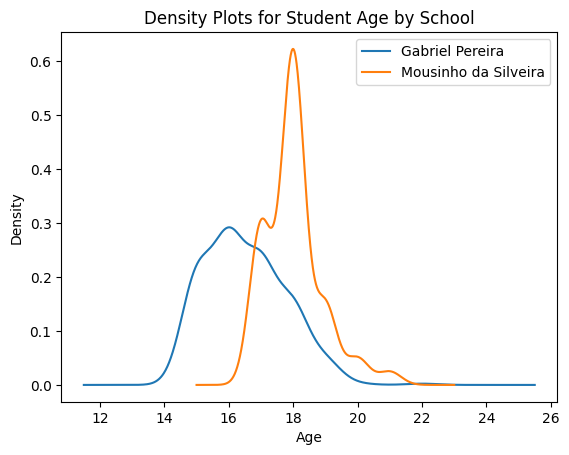

In [33]:
plotting_df_age.plot.density(bw_method = 0.4,
                         title = "Density Plots for Student Age by School") \
                         .set(xlabel = "Age")

This visualization makes it very clear that the students at Mousinho da Silveira are generally quite a bit older. We also see that the distribution of age is generally tighter for Mousinho da Silveira, consistent with the smaller sample standard deviation we found above.

Let's finish this comparison by juxtaposing some boxplots.

Text(0.5, 1.0, '')

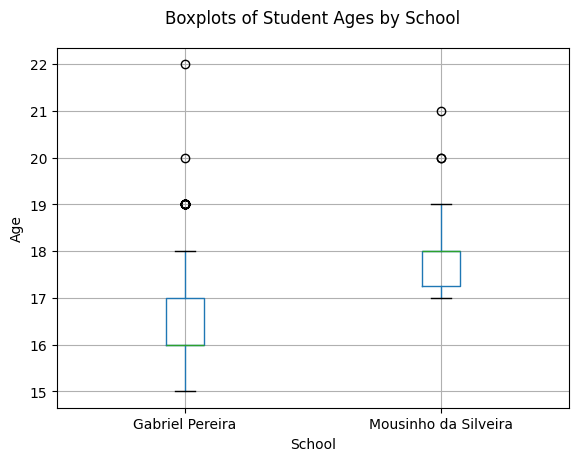

In [34]:
# Generating comparative box plots
student_data.boxplot(column = ["age"], by = "school") \
                     .set(xlabel = "School", ylabel = "Age")
plt.suptitle("Boxplots of Student Ages by School") # Adding overall title
plt.title("") # Removing subtitle with column name

This adds some very intriguing context. For example, the youngest students at Mousinho da Silveira would be at the 75th percentile at Gabriel Pereira.

To wrap up these visual analyses of the numeric variables, let's create some scatterplots comparing `G3` (final grade) to other numeric variables, using colors to indicate levels of a categorical variable.

Given our analysis up to this point, it makes sense to plot final grade against age by school.

[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Final Grade')]

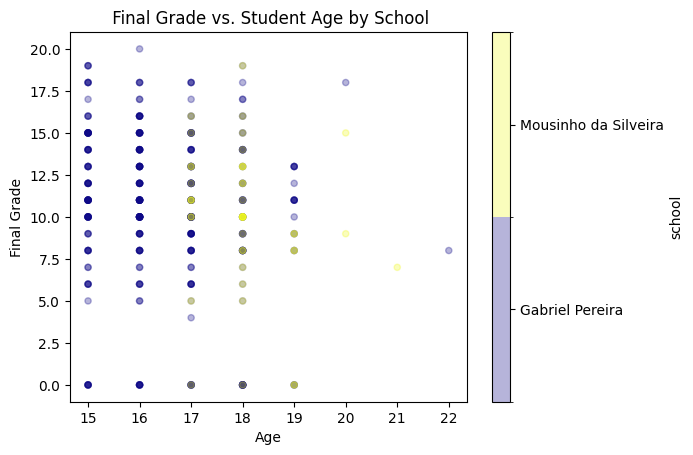

In [35]:
# Generating scatterplot of G3 vs age by school
student_data.plot.scatter(x = "age", y = "G3", c = "school", cmap = "plasma",
                          title = " Final Grade vs. Student Age by School",
                          alpha = 0.3) \
                          .set(xlabel = "Age", ylabel = "Final Grade")

There are no clear patterns in the relationship between age and final grade. *Maybe* a slight negative relationship is visible overall. However, it is difficult to disentangle the relationship by school without the ability to jitter the points; the interpretability of our plot suffers from the fact that final grade and age are both integers.

Let's look at a relationship that we know will be strong and clear: the relationship between first period grade, `G1`, and final grade, `G3`. Let's explore the relationship by `sex`.

[Text(0.5, 0, 'First Period Grade'), Text(0, 0.5, 'Final Grade')]

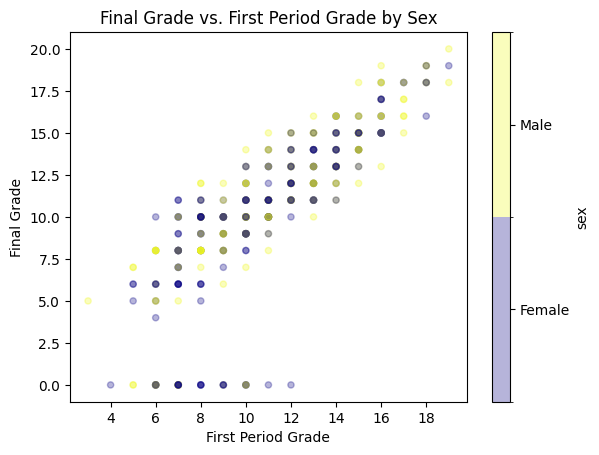

In [36]:
# Generating scatterplot of G3 vs G1 by sex
student_data.plot.scatter(x = "G1", y = "G3", c = "sex", cmap = "plasma",
                          title = "Final Grade vs. First Period Grade by Sex",
                          alpha = 0.3) \
                          .set(xlabel = "First Period Grade", ylabel = "Final Grade")

That's easier to look at!

It seems the relationship between first period grade and final grade is relatively similar for male and female students. One additional note is that the only students to receive a final grade of 0 after having a first period grade above 10 are females. Hopefully they are okay!

---

## Part 2: Plotting NFL Game Data

For part 2 of this homework assignment, we will explore a dataset characterizing NFL football games over multiple seasons. We'll start by exploring the data and end by creating a function that can be used to easily generate plots of the data.

### Task 1: Reading in the Data

Before we begin exploring the data, we need to read it in and tidy up a few things. Let's start by importing the data and printing the first few rows.

In [43]:
 # Reading in the data and printing head
nfl_data = pd.read_csv("https://www4.stat.ncsu.edu/~online/datasets/scoresFull.csv")
nfl_data.head()

,week,date,day,season,awayTeam,AQ1,AQ2,AQ3,AQ4,AOT,...,homeFumLost,homeNumPen,homePenYds,home3rdConv,home3rdAtt,home4thConv,home4thAtt,homeTOP,HminusAScore,homeSpread
0,1,5-Sep,Thu,2002,San Francisco 49ers,3,0,7,6,-1,...,0,10,80,4,8,0,1,32.47,-3,-4.0
1,1,8-Sep,Sun,2002,Minnesota Vikings,3,17,0,3,-1,...,1,4,33,2,6,0,0,28.48,4,4.5
2,1,8-Sep,Sun,2002,New Orleans Saints,6,7,7,0,6,...,0,8,85,1,6,0,1,31.48,-6,6.0
3,1,8-Sep,Sun,2002,New York Jets,0,17,3,11,6,...,1,10,82,4,8,2,2,39.13,-6,-3.0
4,1,8-Sep,Sun,2002,Arizona Cardinals,10,3,3,7,-1,...,0,7,56,6,10,1,2,34.40,8,6.0


And now we will convert several string variables to category type. We'll do this via a loop to make life easier! Note that the loop would tell us if we misspelled a variable name.

In [44]:
# Creating a list of variables to convert
cat_vars = ["homeTeam", "awayTeam", "day", "stadium", "startTime", "toss", "roof", "surface"]

# Looping through variables and converting to category
# Confirming variable names are correct
for v in cat_vars:
    if v in nfl_data.columns:
        nfl_data[v] = nfl_data[v].astype("category")
    else:
        print(v, " not in dataframe")

Let's print the type for each variable we wanted to convert to ensure the type changed as we wanted it to.

In [45]:
# Looping through converted columns to confirm conversion
for v in cat_vars:
    print(v, " : ", nfl_data[v].dtype)

homeTeam  :  category
awayTeam  :  category
day  :  category
stadium  :  category
startTime  :  category
toss  :  category
roof  :  category
surface  :  category


Excellent! All the variables are now category types!

### Task 2: Summarizing the NFL Data

It's time to generate some numerical and graphical summaries of the data. We will focus on trends across time. That is, we will see how the behavior of game metrics vary across weeks of seasons as well as across seasons.

Because of our focus, we need to subset the data to only the regular season, or where `week` is not between 1 and 17. We'll print the unique values of `week` to confirm the subsetting worked.

In [57]:
# Creating a list of week number strings
reg_season_str = [str(num) for num in range(1,18)]

# Subsetting the data to only regular season games
nfl_data = nfl_data[nfl_data.week.isin(reg_season_str)]

# Confirming
nfl_data.week.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17'], dtype=object)

We are now ready to explore the data. To gain an understanding of how home field advantage and overall scoring have trended across time, we will focus on three variables:

* `AFinal`: the final score for the away team
* `HFinal`: the final score for the home team
* `HminusAScore`: the final score differential for the home team

Let's produce some numerical summaries of these variables across time. We'll start by generating the mean, median, and standard deviation of each variable for all season-week pairs in the dataset.

In [65]:
# Creating an integer version of week
nfl_data["week_int"] = nfl_data.week.astype("int")

# Generating summary stats for AFinal, HFinal, and HminusAScore by season-week
season_week_summ = pd.pivot_table(nfl_data, values = ["AFinal", "HFinal", "HminusAScore"], index = ["season", "week_int"], aggfunc = ["mean", "median", "std"])

# Printing summary stats by season-week
season_week_summ

mean                         median                      \
                    AFinal     HFinal HminusAScore AFinal HFinal HminusAScore   
season week_int                                                                 
2002   1         23.125000  26.125000     3.000000   23.0   27.0          3.0   
       2         22.687500  18.187500    -4.500000   23.5   16.5         -6.5   
       3         19.571429  24.428571     4.857143   22.0   27.0          3.0   
       4         18.928571  28.285714     9.357143   19.0   27.0          9.0   
       5         24.000000  23.214286    -0.785714   23.0   25.5         -3.5   
...                    ...        ...          ...    ...    ...          ...   
2014   13        20.687500  27.312500     6.625000   20.0   27.5          3.0   
       14        27.062500  19.750000    -7.312500   24.5   19.0         -9.5   
       15        18.000000  18.437500     0.437500   13.5   18.0          2.0   
       16        22.875000  22.937500     0.062500   22.0   23.0          2.0   
       17        20.812500  20.500000    -0.312500   17.0   20.0          3.5   

                       std                          
                    AFinal     HFinal HminusAScore  
season week_int                                     
2002   1          9.680737  11.050641    12.121606  
       2         12.354318  10.387292    17.530925  
       3         11.765100  11.460395    15.114217  
       4          8.939663  14.187907    14.248385  
       5         10.355229   8.441460    12.819328  
...                    ...        ...          ...  
2014   13         9.470788  14.012940    18.351658  
       14         9.698582  10.908712    14.777094  
       15         8.899438   9.750000    14.240640  
       16        10.052363  11.227756    14.475122  
       17        11.438058  10.013324    16.479153  

[221 rows x 9 columns]

We have the results we want, but it's a lot to process. Because we saved the summary statistics as an object, we can extract year-specific subsets to explore. Let's look at the data for 2010.

In [73]:
# Subsetting to 2010 only
season_week_summ.loc[(2010, (range(1,18))), : ]

mean                         median                      \
                    AFinal     HFinal HminusAScore AFinal HFinal HminusAScore   
season week_int                                                                 
2010   1         14.875000  21.687500     6.812500   14.0   19.5          6.0   
       2         17.437500  24.000000     6.562500   14.0   24.5          0.0   
       3         23.125000  20.250000    -2.875000   25.0   23.5         -1.0   
       4         20.571429  20.714286     0.142857   18.5   18.5          2.0   
       5         22.142857  23.428571     1.285714   21.5   25.0          0.0   
       6         21.642857  21.357143    -0.285714   22.0   21.5          3.0   
       7         26.357143  26.285714    -0.071429   23.0   22.5          2.0   
       8         18.307692  23.384615     5.076923   17.0   24.0          8.0   
       9         22.769231  23.153846     0.384615   23.0   23.0          2.0   
       10        25.857143  26.071429     0.214286   22.5   26.0          4.0   
       11        22.937500  22.625000    -0.312500   19.5   28.5          3.0   
       12        24.437500  21.000000    -3.437500   24.5   22.0         -3.0   
       13        18.625000  23.562500     4.937500   16.5   27.0         -3.0   
       14        18.937500  21.937500     3.000000   19.0   25.0          1.5   
       15        23.875000  24.812500     0.937500   23.5   25.0          2.5   
       16        21.812500  25.187500     3.375000   20.0   26.5          1.0   
       17        16.000000  21.750000     5.750000   13.5   18.0          6.5   

                       std                          
                    AFinal     HFinal HminusAScore  
season week_int                                     
2010   1          6.173870   9.823229     9.282376  
       2          8.074394  11.069478    14.696797  
       3          7.847505   9.560335    14.417004  
       4         11.719243   8.118626    14.935024  
       5          9.121885  10.573656    15.449315  
       6          6.946024   8.696658    12.669944  
       7         12.369983   9.848300    15.896126  
       8         10.427405  10.712442    12.223349  
       9          9.211893  10.566032    19.068029  
       10        12.733101   8.278464    14.534725  
       11        11.030073  12.784757    18.405502  
       12        12.350270   7.014271    13.053575  
       13         9.999167  12.811291    16.010283  
       14        11.941350  13.188221    17.212399  
       15         8.913473   8.757616    13.167985  
       16         8.541809  11.338540    15.572947  
       17        11.099550  11.054411    18.123649

Overall, it seems home field advantage was very much a thing in 2010, as only five of the 17 weeks saw away teams scoring more points than home teams. Next, we'll summarize the three variables by season and better understand how home field advantage has trended across time.

Another notable finding is that the two largest average points differentials were in the first two weeks of the season. We'll also summarize the variables by week (across all years) to understand if this is common, or if more lopsided games were only an artifact of the 2010 season. Maybe home fans are more passionate when they still have hope for a great season!

Let's now look at the summary statistics by season to get a better understanding of trends across time.

In [75]:
# Generating summary stats for AFinal, HFinal, and HminusAScore by season
season_summ = pd.pivot_table(nfl_data, values = ["AFinal", "HFinal", "HminusAScore"], index = "season", aggfunc = ["mean", "median", "std"])

# Printing summary stats by season
season_summ

mean                         median                      \
           AFinal     HFinal HminusAScore AFinal HFinal HminusAScore   
season                                                                 
2002    20.550781  22.796875     2.246094   20.5   23.0          3.0   
2003    19.054688  22.609375     3.554688   19.0   23.0          3.0   
2004    20.230469  22.738281     2.507812   19.0   23.0          3.0   
2005    18.792969  22.441406     3.648438   19.0   21.0          3.0   
2006    20.234375  21.082031     0.847656   21.0   20.0          2.0   
2007    20.253906  23.121094     2.867188   20.0   22.0          3.0   
2008    20.750000  23.308594     2.558594   20.0   24.0          3.0   
2009    20.363281  22.570312     2.207031   20.0   23.0          3.0   
2010    21.089844  22.984375     1.894531   20.0   23.0          3.0   
2011    20.546875  23.812500     3.265625   20.0   23.0          3.0   
2012    21.539062  23.972656     2.433594   21.5   23.0          3.0   
2013    21.855469  24.960938     3.105469   21.0   24.0          3.0   
2014    21.343750  23.832031     2.488281   21.0   23.0          3.0   

              std                          
           AFinal     HFinal HminusAScore  
season                                     
2002    10.064759  10.182152    14.071456  
2003    10.251970  10.119470    14.836525  
2004    10.175596  10.400502    14.036924  
2005     9.948894   9.797383    14.702322  
2006    10.386254   9.856475    14.421261  
2007    10.703215  10.568033    15.430233  
2008    10.420944  10.454499    15.308734  
2009    10.672526  10.666557    16.481008  
2010    10.288187  10.251339    15.013217  
2011     9.634789  10.524109    15.203449  
2012    10.404676  10.559413    15.673991  
2013     9.664500  10.533534    14.167645  
2014     9.877634  10.954053    15.655853

Highlighting the continued trend toward offense-friendly rules and pass-heavy offenses, there was an upward trend in mean points scored by both home and way teams, even if the trend is a bit "noisy."

Additionally, home field advantage seems to have held steady across time, but the mean point differential is also quite noisy; there was less than a point difference between average home and away scores in 2006.

Let's generate summary statistics by week (across all years) before moving to graphical summaries.

In [78]:
# Generating summary stats for AFinal, HFinal, and HminusAScore by season
week_summ = pd.pivot_table(nfl_data, values = ["AFinal", "HFinal", "HminusAScore"], index = "week_int", aggfunc = ["mean", "median", "std"])

# Printing summary stats by season
week_summ

mean                         median                      \
             AFinal     HFinal HminusAScore AFinal HFinal HminusAScore   
week_int                                                                 
1         19.716346  22.139423     2.423077   20.0   20.5          3.0   
2         19.545894  22.840580     3.294686   20.0   23.0          3.0   
3         20.767677  22.646465     1.878788   23.0   23.0          3.0   
4         20.983696  24.092391     3.108696   20.0   23.0          3.0   
5         20.527473  24.324176     3.796703   20.5   24.0          3.0   
6         20.679558  22.988950     2.309392   20.0   23.0          3.0   
7         21.111111  23.338889     2.227778   20.0   23.0          3.0   
8         20.151685  23.359551     3.207865   20.0   23.0          4.0   
9         22.146067  22.258427     0.112360   23.0   21.5          2.0   
10        21.543011  22.983871     1.440860   21.0   23.0          2.0   
11        19.592040  22.582090     2.990050   19.0   22.0          3.0   
12        21.507317  22.878049     1.370732   21.0   21.0          3.0   
13        20.437500  23.201923     2.764423   20.0   23.0          1.5   
14        19.394231  24.605769     5.211538   20.0   24.0          4.0   
15        20.942308  22.543269     1.600962   20.0   21.0          2.0   
16        20.802885  22.168269     1.365385   20.0   21.0          1.5   
17        19.235577  23.807692     4.572115   19.0   23.0          4.0   

                std                          
             AFinal     HFinal HminusAScore  
week_int                                     
1          8.977768  10.595541    13.800996  
2         10.433170   9.842384    14.467745  
3          9.634781  10.153955    14.367739  
4         10.062361  10.874704    15.630960  
5         10.300824  10.158379    15.346365  
6         10.270079   9.254422    14.676261  
7         10.674927  10.948924    15.620439  
8          9.782639  10.573121    14.946479  
9          9.701244   9.152849    14.259847  
10        10.015705  10.753491    14.932614  
11        10.017122  10.326397    14.509993  
12        10.795160  10.035220    14.249497  
13        10.131786  10.579700    15.149410  
14        10.203171  11.453682    16.224674  
15        11.224393  10.288498    15.352521  
16        10.330041  11.019331    16.187344  
17        10.637064  10.339247    14.875476

Looking at these statistics there are no clear trends for the center and spread of away team score, home team, score, or point differential across weeks. Maybe the most surprising statistics is the mean point differential for week 9, which is barely positive.